In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls /content/gdrive/MyDrive

 ACC_project				      LOR_CSE_HOD.docx
'Admission Docs'			      LOR_CSE_PROFESSOR.docx
 Admission_updated_docs			      LOR_Manager_Naveen.docx
 ASE					     'Masters Resources'
 ASP-Assignment-01			     'Pre Entry - Interview Planning.xlsx'
 ASP-Assignment-02			     'Project Final Report.gdoc'
 ASP-Assignment-03			      Resume_Subhram_Satyajeet.docx
 ASP-Assignment-04			     'Satyajeet Subhram -LOR by Prof Debahuti Mishra.pdf'
'CAmbridge book 1-20220401T111740Z-001.zip'  'Satyajeet Subhram -LOR - Prof S P Pati.pdf'
'CAmbridge book 1-20220401T111749Z-001.zip'   SOP_Subhram.docx
'Cambridge book 2-20220401T111757Z-001.zip'   Subhram_Satyajeet_resume_Teksystems.pdf
'Colab Notebooks'			     'TEKSYSTEMS Docs'
 Course-Material.zip			     'Teksystems farewell'
 flow_diagram.drawio			     'Topics in AI.zip'
'IELTS books'				      video1296183071.mp4
 InternshipProject2			      Visa_docs


In [ ]:
!mkdir /content/gdrive/MyDrive/InternshipProject2
!cd /content/gdrive/MyDrive/InternshipProject2/

mkdir: cannot create directory ‘/content/gdrive/MyDrive/InternshipProject2’: File exists


In [ ]:
!cd /content/gdrive/MyDrive/InternshipProject2/

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df = pd.read_csv('data.csv')  # Replace with your actual file
display(df)

,Index,source,bank,title,review_text,rating,date,url,source_type,review_sentiment,sentiment_score,review_text_processed
0,0,reddit,CIBC,"I just had the worst experience with CIBC, wil...",I helped my dad apply for a CIBC credit card 4...,1515,2021-05-22 20:03,https://www.reddit.com/r/PersonalFinanceCanada...,post,negative,-1,helped dad apply cibc credit card week ago onl...
1,1,reddit,CIBC,"CIBC called and asked ""How are you doing?""",I'm not sure if this is a fraud call or not. C...,227,2022-12-07 16:51,https://www.reddit.com/r/PersonalFinanceCanada...,post,negative,-1,sure fraud call cibc randomly called ask neede...
2,2,reddit,CIBC,What’s so bad about CIBC?,It seems from the big 5 banks everyone has som...,0,2022-03-15 0:57,https://www.reddit.com/r/PersonalFinanceCanada...,post,negative,-1,seems big bank everyone something cibc bad
3,3,reddit,CIBC,Cibc just increased my LOC interest rate by 3....,I’m carrying a fairly large balance on my LOC ...,1088,2023-07-19 17:37,https://www.reddit.com/r/PersonalFinanceCanada...,post,neutral,0,carrying fairly large balance loc pay anytime ...
4,4,reddit,CIBC,CIBC closing my account,Received a letter today from CIBC stating they...,750,2023-06-25 17:22,https://www.reddit.com/r/PersonalFinanceCanada...,post,neutral,0,received letter today cibc stating ending bank...
...,...,...,...,...,...,...,...,...,...,...,...,...
35600,35600,google_app_review,TD,Doesn't work,it kept showing me system error cant log in ac...,1,2016-09-24,358790776,review,negative,-1,kept showing system error cant log account man...
35601,35601,google_app_review,TD,Doesn't work,system error every time i try to log in cant e...,1,2016-09-24,358790776,review,negative,-1,system error every time try log cant even use app
35602,35602,google_app_review,TD,Great,app is good until td touch comes out you can a...,5,2016-09-24,358790776,review,positive,1,app good td touch come add bank card iphone wa...
35603,35603,google_app_review,TD,Crashes with e transfers,brutal trying to do an etransfer to collect mo...,1,2016-09-24,358790776,review,negative,-1,brutal trying etransfer collect money called s...


In [ ]:
reviews = df['review_text']
labels = df['sentiment_score']


In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
def get_wordnet_pos(word):
    """Map POS tag to first character accepted by lemmatizer"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [ ]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    # Remove stopwords and non-alphabetic tokens
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    # Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]
    return lemmatized_tokens

reviews_tokenized = reviews.apply(preprocess_text)


In [ ]:
display(reviews_tokenized)

,review_text
0,"[help, dad, apply, cibc, credit, card, week, a..."
1,"[sure, fraud, call, cibc, randomly, call, ask,..."
2,"[seem, big, bank, everyone, something, cibc, bad]"
3,"[carry, fairly, large, balance, loc, pay, anyt..."
4,"[receive, letter, today, cibc, state, end, ban..."
...,...
35600,"[kept, show, system, error, cant, log, account..."
35601,"[system, error, every, time, try, log, cant, e..."
35602,"[app, good, td, touch, come, add, bank, card, ..."
35603,"[brutal, try, etransfer, collect, money, call,..."


In [ ]:
word2vec_model = Word2Vec(sentences=reviews_tokenized, vector_size=100, window=5, min_count=2, sg=1)


In [ ]:
def get_review_vector(review, model):
    review_vec = np.zeros(100)  # 100 is the vector size used in Word2Vec
    count = 0
    for word in review:
        if word in model.wv.key_to_index:  # check if word is in the vocabulary
            review_vec += model.wv[word]
            count += 1
    return review_vec / count if count > 0 else review_vec

In [ ]:
# X = np.array([get_review_vector(review, word2vec_model) for review in reviews_tokenized])
X_word2vec = np.array([get_review_vector(review, word2vec_model) for review in reviews_tokenized])


In [ ]:
reviews_joined = [' '.join(review) for review in reviews_tokenized]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=3000)  # Use top 3000 words for features
X_tfidf = tfidf_vectorizer.fit_transform(reviews_joined).toarray()
X_combined = np.hstack((X_word2vec, X_tfidf))

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, labels, test_size=0.2, random_state=42)

In [ ]:
display(X_train)
display(y_train)

array([[ 0.14101559,  0.30898423,  0.38600184, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02491627,  0.28355004,  0.23069752, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.35961506,  0.19414419, -0.07355298, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.09224698,  0.19926562,  0.18753796, ...,  0.        ,
         0.        ,  0.        ],
       [-0.01718998,  0.18642748,  0.07002308, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.12815831,  0.17508635, -0.05267535, ...,  0.        ,
         0.        ,  0.        ]])

,sentiment_score
26742,1
13904,-1
26110,0
9040,0
24822,1
...,...
16850,-1
6265,0
11284,-1
860,1


In [ ]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svm_classifier.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8396292655525909
Classification Report:
               precision    recall  f1-score   support

          -1       0.83      0.90      0.86      2979
           0       0.82      0.76      0.79      2089
           1       0.87      0.84      0.86      2053

    accuracy                           0.84      7121
   macro avg       0.84      0.83      0.84      7121
weighted avg       0.84      0.84      0.84      7121



In [ ]:
!pip install torch # Install the PyTorch library
import torch # Import the torch module

In [ ]:
!pip install joblib # Install joblib if you haven't already
import joblib

model_save_name = 'classifier.joblib'  # Change the extension to .joblib
path = F"/content/gdrive/My Drive/{model_save_name}"
joblib.dump(svm_classifier, path)

['/content/gdrive/My Drive/classifier.joblib']

In [ ]:
model_save_name = 'classifier.pt'
path = F"/content/gdrive/My Drive/{model_save_name}"
torch.save(model.state_dict(), path)

NameError: name 'torch' is not defined

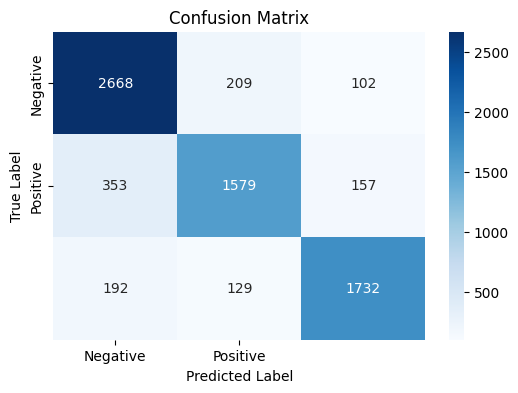

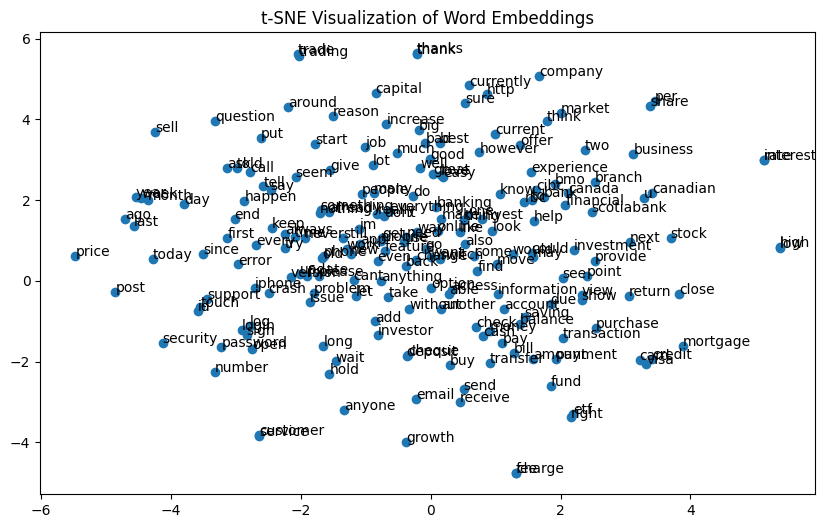

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE

cm = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Apply t-SNE to Word2Vec Embeddings
# We'll visualize a subset of the vocabulary to keep it manageable
words = list(word2vec_model.wv.index_to_key)[:200]  # Take a subset of 200 words
word_vectors = np.array([word2vec_model.wv[word] for word in words])

# Reducing dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Plot the Word Vectors
plt.figure(figsize=(10, 6))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])

# Annotating words
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

plt.title('t-SNE Visualization of Word Embeddings')
plt.show()

In [ ]:
new_data = pd.read_csv('raw_canadian_banks_reddit_posts__credit_unions_2024_11_09-23_31_48.csv')  # Replace with your actual file path
new_reviews = new_data['review_text']  # Assuming the new file has a 'review' column
display(new_reviews)

,review_text
0,Hi my wife has a not insignificant amount of U...
1,Hi all! \n\nI am a 35 yo mama of two small kid...
2,"Hello everyone,\n\nI have a question for Vanci..."
3,Long story short I tried to set up a mutua...
4,"Right now I'm spread across TD Waterhouse, BMO..."
...,...
19331,#Welcome to the Toronto Daily Thread.\r\n\r\nT...
19332,edit: edit: found more resources\n\nhttp://esc...
19333,#Welcome to the Toronto Daily Thread.\r\n\r\nT...
19334,**Monday Feb 18**\n\n[Winter Stations 2019](ht...


In [ ]:
new_data.columns

Index(['Index', 'source', 'bank', 'title', 'review_text', 'date'], dtype='object')

In [ ]:
# Load the new dataset
new_data = pd.read_csv('raw_canadian_banks_reddit_posts__credit_unions_2024_11_09-23_31_48.csv')  # Replace with your actual file path
new_reviews = new_data['review_text']  # Assuming the new file has a 'review' column

label_mapping = {1: 'positive', -1: 'negative', 0: 'neutral'}

# Preprocess the new reviews
new_reviews_tokenized = new_reviews.apply(preprocess_text)

# Convert to Word2Vec vectors
new_X_word2vec = np.array([get_review_vector(review, word2vec_model) for review in new_reviews_tokenized])

# Convert to TF-IDF vectors (use the same vectorizer fitted on training data)
new_reviews_joined = [' '.join(review) for review in new_reviews_tokenized]
new_X_tfidf = tfidf_vectorizer.transform(new_reviews_joined).toarray()

# Combine Word2Vec and TF-IDF features
new_X_combined = np.hstack((new_X_word2vec, new_X_tfidf))

# Predict the sentiment for each review
new_predictions = svm_classifier.predict(new_X_combined)
new_predictions_text = [label_mapping[pred] for pred in new_predictions]


# Save the predictions in the original DataFrame
new_data['predicted_sentiment'] = new_predictions_text

# Save to a new CSV file
new_data.to_csv('labeled_review1.csv', index=False)

print("Predicted labels saved to labeled_reviews1.csv")


Predicted labels saved to labeled_reviews1.csv


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.cloud import storage
from google.oauth2 import service_account
import os
import csv
from datetime import datetime

def download_latest_blob_with_timestamp(bucket_name):
    """Downloads the latest blob from the bucket and uses its timestamp as the filename."""
    SERVICE_ACCOUNT_FILE = 'amplified-brook-416922-6a39d3e05104.json'
    credentials = service_account.Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE)

    storage_client = storage.Client(project='amplified-brook-416922', credentials=credentials)
    bucket = storage_client.bucket(bucket_name)

    # Get all blobs and then sort them by time_created
    blobs = list(bucket.list_blobs())
    blobs.sort(key=lambda blob: blob.time_created, reverse=True)
    # Sort in descending order (newest first)

    latest_blob = blobs[0] if blobs else None
    print(latest_blob.name)
    if latest_blob:
        # Get the timestamp from the blob's metadata
        timestamp = latest_blob.time_created.strftime("%Y%m%d_%H%M%S")
        # Format the timestamp as desired (e.g., YYYYMMDD_HHMMSS)

        # Create the destination filename using the timestamp
        #destination_file_name = os.path.join(destination_folder, f"downloaded_file_{timestamp}.csv")
        destination_file_name = f"unlabeled_raw_data.csv"

        # Download the latest blob to the specified folder
        latest_blob.download_to_filename(destination_file_name)
        print(f"Downloaded latest blob: gs://{bucket_name}/{latest_blob.name} to {destination_file_name}")
    else:
        print("No blobs found in the bucket.")


# Example usage
bucket_name = 'text-mining-source-dump'  # Replace with your bucket name
#destination_folder = '/path/to/your/destination/folder'  # Replace with your desired folder path

download_latest_blob_with_timestamp(bucket_name)

raw_canadian_banks_reddit_posts__credit_unions_2024_11_09-23_31_48
Downloaded latest blob: gs://text-mining-source-dump/raw_canadian_banks_reddit_posts__credit_unions_2024_11_09-23_31_48 to unlabeled_raw_data.csv


In [ ]:
from google.cloud import storage
from google.oauth2 import service_account
import os

def download_blob(bucket_name, source_blob_name, destination_file_name):
    """Downloads a blob from the bucket."""
    SERVICE_ACCOUNT_FILE = 'amplified-brook-416922-6a39d3e05104.json'  # Replace if needed
    credentials = service_account.Credentials.from_service_account_file(
        SERVICE_ACCOUNT_FILE
    )

    storage_client = storage.Client(project='amplified-brook-416922', credentials=credentials)  # Replace project ID if needed
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(source_blob_name)

    blob.download_to_filename(destination_file_name)

    print(
        f"Blob {source_blob_name} downloaded to {destination_file_name}."
    )

# Example usage:
bucket_name = "text-mining-source-dump"  # Replace with your bucket name
source_blob_name = "aggregated_data.csv"  # Replace with the name of the file in the bucket
destination_file_name = "unlabeled_raw_data.csv"  # Replace with the desired local filename

download_blob(bucket_name, source_blob_name, destination_file_name)

Blob aggregated_data.csv downloaded to unlabeled_raw_data.csv.


In [ ]:
import pandas as pd
import numpy as np
import joblib

# ... (Your existing functions: preprocess_text, get_review_vector) ...

# Load the saved SVM model
model_save_name = 'classifier.joblib'
path = F"/content/gdrive/My Drive/{model_save_name}"
svm_classifier = joblib.load(path)

# Load the new dataset
new_data = pd.read_csv('unlabeled_raw_data.csv')
new_reviews = new_data['review_text']

label_mapping = {1: 'positive', -1: 'negative', 0: 'neutral'}

# Preprocess the new reviews
new_reviews_tokenized = new_reviews.apply(preprocess_text)

# Convert to Word2Vec vectors
new_X_word2vec = np.array([get_review_vector(review, word2vec_model) for review in new_reviews_tokenized])

# Convert to TF-IDF vectors (assuming tfidf_vectorizer is already fitted)
new_reviews_joined = [' '.join(review) for review in new_reviews_tokenized]
new_X_tfidf = tfidf_vectorizer.transform(new_reviews_joined).toarray()

# Combine Word2Vec and TF-IDF features
new_X_combined = np.hstack((new_X_word2vec, new_X_tfidf))

# Predict the sentiment for each review using the loaded model
new_predictions = svm_classifier.predict(new_X_combined)
new_predictions_text = [label_mapping[pred] for pred in new_predictions]

# Print or store the predictions as needed
# for i, prediction in enumerate(new_predictions_text):
#     print(f"Review {i + 1}: {prediction}")

# Save the predictions in the original DataFrame
new_data['predicted_sentiment'] = new_predictions_text

# Save to a new CSV file
new_data.to_csv('labeled_review1.csv', index=False)

print("Predicted labels saved to labeled_reviews1.csv")


<ipython-input-48-3f1dd02c3591>:13: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  new_data = pd.read_csv('unlabeled_raw_data.csv')


Predicted labels saved to labeled_reviews1.csv


In [ ]:
res = pd.read_csv('labeled_review1.csv')
display(res)

<ipython-input-49-0e3e278e916e>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  res = pd.read_csv('labeled_review1.csv')


,Index,source,bank,title,review_text,rating,date,url,source_type,review_text_processed,predicted_sentiment
0,0,GooglePlay,BMO,Lacklustre and Underwhelming,come on bmo get mobile deposit already its bee...,2,2016-09-25,https://play.google.com,post,"['come', 'bmo', 'mobile', 'deposit', 'availabl...",neutral
1,1,GooglePlay,BMO,NaN,compact and light on resources,5,2016-09-22,https://play.google.com,post,"['compact', 'light', 'resource']",neutral
2,2,GooglePlay,BMO,Used to be great...,this app used to be amazing but once it did th...,1,2016-09-21,https://play.google.com,post,"['app', 'amazing', 'new', 'update', 'take', 'f...",negative
3,3,GooglePlay,BMO,Needs SMS & Cheque depositing,its a great app especially now that it doesnt ...,4,2016-09-21,https://play.google.com,post,"['great', 'app', 'especially', 'not', '30', 'm...",positive
4,4,GooglePlay,BMO,NaN,having problems opening this app now why,3,2016-09-21,https://play.google.com,post,"['have', 'problem', 'open', 'app']",negative
...,...,...,...,...,...,...,...,...,...,...,...
143467,35600,google_app_review,TD,Doesn't work,it kept showing me system error cant log in ac...,1,2016-09-24,358790776,review,kept showing system error cant log account man...,negative
143468,35601,google_app_review,TD,Doesn't work,system error every time i try to log in cant e...,1,2016-09-24,358790776,review,system error every time try log cant even use app,negative
143469,35602,google_app_review,TD,Great,app is good until td touch comes out you can a...,5,2016-09-24,358790776,review,app good td touch come add bank card iphone wa...,positive
143470,35603,google_app_review,TD,Crashes with e transfers,brutal trying to do an etransfer to collect mo...,1,2016-09-24,358790776,review,brutal trying etransfer collect money called s...,negative


In [ ]:
from google.cloud import storage
from google.oauth2 import service_account
import os

def download_blob(bucket_name, source_blob_name, destination_file_name):
    """Downloads a blob from the bucket."""
    SERVICE_ACCOUNT_FILE = 'amplified-brook-416922-6a39d3e05104.json'  # Replace if needed
    credentials = service_account.Credentials.from_service_account_file(
        SERVICE_ACCOUNT_FILE
    )

    storage_client = storage.Client(project='amplified-brook-416922', credentials=credentials)  # Replace project ID if needed
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(source_blob_name)

    blob.download_to_filename(destination_file_name)

    print(
        f"Blob {source_blob_name} downloaded to {destination_file_name}."
    )

# Example usage:
bucket_name = "text-mining-labeled-data"  # Replace with your bucket name
source_blob_name = "labeled_reviews1"  # Replace with the name of the file in the bucket
destination_file_name = "labeled_reviews.csv"  # Replace with the desired local filename

download_blob(bucket_name, source_blob_name, destination_file_name)

Blob labeled_reviews1 downloaded to labeled_reviews.csv.


In [ ]:
!pip install pandas

import pandas as pd

def concatenate_csv(file1, file2, output_file):
    """Concatenates two CSV files into a single CSV file.

    Args:
        file1 (str): Path to the first CSV file.
        file2 (str): Path to the second CSV file.
        output_file (str): Path to the output CSV file.
    """

    # Read the CSV files into Pandas DataFrames
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)

    # Concatenate the DataFrames
    concatenated_df = pd.concat([df1, df2], ignore_index=True)

    # Save the concatenated DataFrame to a new CSV file
    concatenated_df.to_csv(output_file, index=False)

    print(f"CSV files concatenated and saved to {output_file}")


# Example usage:
file1 = 'labeled_reviews.csv'
file2 = 'labeled_review1.csv'
output_file = 'concatenated_file.csv'

concatenate_csv(file1, file2, output_file)

<ipython-input-54-ad690ad54cea>:16: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(file2)


CSV files concatenated and saved to concatenated_file.csv


In [ ]:
from google.cloud import storage
from google.oauth2 import service_account
import os
import csv

def upload_blob(bucket_name, source_file_name, destination_blob_name):
    """Uploads a file to the bucket."""
    # The ID of your GCS bucket
    #bucket_name = "text-mining-source-dump"
    # The path to your file to upload
    #source_file_name = "C:\Users\Subhram Satyajeet\OneDrive - University of Windsor\Desktop\Internship Project 2\Review_Dataset_google_apple_net_banking\Dataset\bmo_google_before_2016.csv"
    # The ID of your GCS object
    #destination_blob_name = "bmo_google_before_2016"

    #Setting the service account credentials for authentication
    SERVICE_ACCOUNT_FILE = 'amplified-brook-416922-6a39d3e05104.json' #key file name
    credentials = service_account.Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE) #setting credentials using key file

    storage_client = storage.Client(project='amplified-brook-416922' ,credentials = credentials)
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(destination_blob_name)

    # Optional: set a generation-match precondition to avoid potential race conditions
    # and data corruptions. The request to upload is aborted if the object's
    # generation number does not match your precondition. For a destination
    # object that does not yet exist, set the if_generation_match precondition to 0.
    # If the destination object already exists in your bucket, set instead a
    # generation-match precondition using its generation number.
    generation_match_precondition = 0

    blob.upload_from_filename(source_file_name, if_generation_match=generation_match_precondition)

    print(
        f"File {source_file_name} uploaded to {destination_blob_name}."
    )

upload_blob('text-mining-labeled-data','concatenated_file.csv','final_labeled_reviews')



File concatenated_file.csv uploaded to final_labeled_reviews.
